### STAT 207 Lab 10: Model Selection

Due: Wednesday, April 22, 23:59:59

### Michael Cao AND minhcao2

This lab consists of 3 main parts. You may add as many cells as you need in order to do the exercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". 

#### The code below generates data to analyze in this lab. Run the code and then work on the questions below.

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import norm, bernoulli

In [43]:
b0 = -2.5
bvec = np.repeat([1, -1, 0.05], [2, 2, 3])
n = 500
nX = bvec.size
X = norm.rvs(size=n*nX, loc=5, scale=2.5, random_state=1).reshape((n, nX))
odds = np.exp(b0 + np.matmul(X, bvec)) 
y = bernoulli.rvs(p=odds/(1+odds), size=n, random_state=13)
Xnames = []
for i in range(nX):
    list.append(Xnames, 'X'+str(i+1))
df = pd.DataFrame(X, columns=Xnames)
df['y'] = y
display(df.shape[0], df)

500

,X1,X2,X3,X4,X5,X6,X7,y
0,9.060863,3.470609,3.679571,2.317578,7.163519,-0.753847,9.362029,1
1,3.096983,5.797598,4.376574,8.655270,-0.150352,4.193957,4.039864,0
2,7.834424,2.250272,4.568929,2.805354,5.105534,6.457038,2.248452,0
3,7.861809,7.253977,6.256236,7.252140,3.290680,4.692774,2.660576,1
4,4.330280,6.325889,3.270848,4.008116,3.282068,2.886986,3.321885,0
...,...,...,...,...,...,...,...,...
495,2.474653,3.777289,6.446762,1.329203,7.476578,5.580584,5.553371,0
496,1.399337,1.570622,5.086186,4.161299,3.459894,4.602205,2.673328,0
497,4.541364,6.255047,2.680907,2.804052,4.603687,3.746360,4.702619,1
498,5.059423,0.581945,8.853574,4.390039,5.091781,1.895300,4.248366,0


### Part 1: Log-Likelihood-Ratio test (6 pts)

In this part we consider a logit model of the form:

$$
\log\left({p_i \over 1 - p_i}\right) = b_0 + b_1*\text{X1}_i + b_2*\text{X2}_i + \cdots + b_7*\text{X7}_i
$$

where $p_i = P(Y_i = 1)$, and the subscript $i$ refers to the $i$th row of the data frame df: 

$$
 \text{X1}_i\quad \text{X2}_i \quad \cdots \quad \text{X7}_i \quad y_i 
$$

for $i=1,2,\ldots,500$.

**a) (1 pt)** Use python to fit the logit model described above to the data in df. Display the model summary.

In [44]:
import numpy as np
import pandas as pd
import zipfile as zp
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [45]:
model1 = smf.logit('y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7', data=df).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.234167
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                            7
Date:                Sat, 29 May 2021   Pseudo R-squ.:                  0.6416
Time:                        16:37:16   Log-Likelihood:                -117.08
converged:                       True   LL-Null:                       -326.71
Covariance Type:            nonrobust   LLR p-value:                 1.770e-86
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8020      0.875     -2.059      0.040      -3.517      -0.087
X1             0.8954      0.112      7.988      0.000       0.676       1.115
X2             0.9939      0.112      8.896      0.000       0.775       1.213
X3            -1.0693      0.120     -8.904      0.000      -1.305      -0.834
X4            -1.0238      0.117     -8.751      0.000      -1.253      -0.794
X5             0.1428      0.069      2.079      0.038       0.008       0.277
X6             0.0221      0.066      0.334      0.738      -0.107       0.151
X7             0.0510      0.068      0.752      0.452      -0.082       0.184
==============================================================================
"""

**b) (3 pts)** We would like to test the null hypothesis

$$
H_0: b_5 = b_6 = b_7 = 0
$$

against the alternative that at least one of the coefficients $b_5$, $b_6$ or $b_7$ is nonzero. Use python to calculate the log-likelihood-ratio test statistic for testing $H_0$ along with its degrees of freedom. Hint: consider what is the null model in this case.

In [46]:
model0 = smf.logit('y ~ X1 + X2 + X3 + X4', data=df).fit()
model0.summary()

Optimization terminated successfully.
         Current function value: 0.239466
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      495
Method:                           MLE   Df Model:                            4
Date:                Sat, 29 May 2021   Pseudo R-squ.:                  0.6335
Time:                        16:37:17   Log-Likelihood:                -119.73
converged:                       True   LL-Null:                       -326.71
Covariance Type:            nonrobust   LLR p-value:                 2.688e-88
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7365      0.679     -1.085      0.278      -2.067       0.594
X1             0.8686      0.108      8.023      0.000       0.656       1.081
X2             0.9731      0.109      8.918      0.000       0.759       1.187
X3            -1.0308      0.114     -9.041      0.000      -1.254      -0.807
X4            -1.0029      0.113     -8.853      0.000      -1.225      -0.781
==============================================================================
"""

**c) (2 pts)** Calculate the p-value for the log-likelihood-ratio test. State whether $H_0$ is accepted or rejected at level $\alpha=0.05$?

In [47]:
# Extract log-likelihood function values 
# and model degrees of freedom from each model
llf0, df0 = model0.llf, model0.df_model
llf1, df1 = model1.llf, model1.df_model
# take differences
llr, dfdiff = -2*(llf0 - llf1), df1 - df0
# display results
pd.DataFrame({'-2*llf': [-2*llf0, -2*llf1, llr], 
              'df_model': [df0, df1, dfdiff]}, 
             index=['model0','model1', 'diff'])

,-2*llf,df_model
model0,239.465835,4.0
model1,234.167038,7.0
diff,5.298797,3.0


In [48]:
# import chisquare function and compute p-value
from scipy.stats import chi2

1 - chi2.cdf(llr, df=dfdiff)

0.15118046957236575

p value > 0.05 => accept null hypothesis


### Part 2: Split the data into training data and test data (4 pts)

**a) (2 pts)** Split the df data frame at random into a training subset data frame and test subset data frame. Make the training subset have 80% of the data, and the test set have the other 20%.

In [49]:
df_train, df_test =train_test_split(df, test_size=0.20, random_state=123457)

NameError: name 'train_test_split' is not defined

In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**b) (1 pt)** Display the first few rows of the training data, and also show the number of total number rows in the training data. 

In [26]:
df_train.head()

,X1,X2,X3,X4,X5,X6,X7,y
447,3.324493,3.018148,7.826513,-1.847854,6.275787,4.365952,3.855843,1
181,4.294985,5.124806,5.548694,1.997111,4.252263,4.218492,5.253008,0
334,2.266740,5.561127,2.412405,1.403137,3.845376,0.554205,1.748816,1
393,6.193342,6.482809,2.409529,3.622811,4.206335,2.903306,1.977249,1
428,3.443359,4.623351,1.499943,1.747335,4.807233,5.519563,7.465490,1


In [27]:
df_train.shape

(400, 8)

**c) (1 pt)** Display the first few rows of the test data, and also show the number of rows in the test data.

In [29]:
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,y
452,6.888436,2.682519,4.224763,8.770279,7.324273,1.612024,7.687789,0
370,6.680071,7.240804,5.854313,1.046580,9.025510,6.556237,-0.892162,1
219,0.463182,5.454353,5.380936,6.241263,5.189943,8.843450,8.939459,0
497,4.541364,6.255047,2.680907,2.804052,4.603687,3.746360,4.702619,1
488,9.541945,9.728218,5.739684,7.085891,5.536955,8.954950,0.548030,0


In [30]:
df_test.shape

(100, 8)

### Part 2: Use the training data for model building (9 pts)

**a) (2 pts)** Using the training data only, fit a logistic regression model that includes all 7 variables. Show the model summary and identify which if any variables have coefficients that are significant at level alpha = 0.05.

In [31]:
model11 = smf.logit('y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7', data=df_train).fit()
model11.summary()

Optimization terminated successfully.
         Current function value: 0.243592
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            7
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.6296
Time:                        13:52:05   Log-Likelihood:                -97.437
converged:                       True   LL-Null:                       -263.04
Covariance Type:            nonrobust   LLR p-value:                 1.289e-67
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4985      0.926     -2.699      0.007      -4.313      -0.684
X1             0.9253      0.126      7.331      0.000       0.678       1.173
X2             1.0172      0.126      8.043      0.000       0.769       1.265
X3            -1.0082      0.130     -7.745      0.000      -1.263      -0.753
X4            -0.9639      0.123     -7.809      0.000      -1.206      -0.722
X5             0.1301      0.072      1.806      0.071      -0.011       0.271
X6             0.0427      0.074      0.576      0.564      -0.103       0.188
X7             0.0247      0.073      0.339      0.735      -0.118       0.168
==============================================================================
"""

x1, x2, x3, x4 significant at $a$ = 0.05

**BIC criterion for model selection:** The BIC criterion is one method for evaluating a fitted model. It is a function of negative log-likelihood (a measure of model fit), and number of parameters (complexity of the model). It aims to trade off model fit and model complexity to avoid 'overfitting' and enhance generalizability. When used as a model selection criterion, models with lower BIC are considered more generalizable than models with higher BIC. 

When using the statsmodels.formula.api logit method for fitting the model the BIC criterion can be obtained from the fitted model using the .bic extension (e.g. model1.bic). 

**b) (1 pt)** Display the BIC value for the model in 2a).

In [33]:
model11.bic

242.80537956452207

**c) (5 pts)** Using the training data only, fit different models with different subsets of the variables included to try to find a good simplified model. Try to find a simplified model that satisfies the following conditions:

+ All variables included in the model (except possibly the intercept) have coefficient p-values below 0.10;

+ Among such models, the BIC is as small as possible.

+ Include the intercept in all models.

You don't need to show the full model summary of each model you tried. Instead make a table of the models you tried. Identify the model by which vairables it included and its BIC value. Also list which variables in each model satisfy the p-value cut-off (p < 0.1). You may also try dropping the least significant variables to see if BIC decreases further. Here is a generic example of a way to organize the results:

| Model Variables | Insignificant variables (p>0.10) | BIC |
| --- | --- | --- |
| X0, X1, ..., X7 | X5, X7 ... | etc. |
| etc. | etc. | etc. |
| X0, X1, X4 |  | 68.33 |
| etc. | etc. | etc. |

It is useful that you can access the p-values from the fitted model using the .pvalues extension, e.g., model.pvalues. That way you can avoid having to display the model summary for each model you try just to get the p-values. Also, you can extract the variables in the model with a call like model.params.index

In [37]:
model11.pvalues[model11.pvalues < 0.1]

Intercept    6.956517e-03
X1           2.291527e-13
X2           8.787616e-16
X3           9.524369e-15
X4           5.761773e-15
X5           7.092268e-02
dtype: float64

In [58]:

df1 = pd.DataFrame({'Model Variables':["X1, X2, X3, X4, X5, X6, X7",
                                       "X1, X2, X3, X4, X5", 
                                       "X1, X2, X3, X4"
                                      , "X1, X2, X3"
                                       , "X1, X2", 
                                       "X1"
                                      , "X1, X4, X3"],
                    'Insignificant variables (p>0.10)':["X6, X7"
                                                        ,"Non"
                                                        , "Non"
                                                        , "Non"
                                                        , "Non"
                                                        , "Non"
                                                       , "Non"],
                    'BIC': [model11.bic, model12.bic, model13.bic, model13_5.bic,
                           model14.bic, model15.bic, model16.bic] })
df1

,Model Variables,Insignificant variables (p>0.10),BIC
0,"X1, X2, X3, X4, X5, X6, X7","X6, X7",242.805380
1,"X1, X2, X3, X4, X5",Non,231.329250
2,"X1, X2, X3, X4",Non,228.836688
3,"X1, X2, X3",Non,357.836404
4,"X1, X2",Non,439.109941
5,X1,Non,506.470096
6,"X1, X4, X3",Non,443.541330


In [82]:
model12 = smf.logit('y ~ X1 + X2 + X3 + X4 + X5', data=df_train).fit()
model13 = smf.logit('y ~ X1 + X2 + X3 + X4', data=df_train).fit()
model13_5 = smf.logit('y ~ X1 + X2 + X3', data=df_train).fit()
model14 = smf.logit('y ~ X1 + X2', data=df_train).fit()
model15 = smf.logit('y ~ X1', data=df_train).fit()
model16 = smf.logit('y ~ X1 + X4 + X3', data=df_train).fit()


Optimization terminated successfully.
         Current function value: 0.244226
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.248599
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.417338
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.526419
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.618109
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.428489
         Iterations 7


**d) (1 pt)** Show the model summary for the final model you selected. Explain briefly why it was selected.

In [83]:
model13 = smf.logit('y ~ X1 + X2 + X3 + X4', data=df_train).fit()
model13.summary()

Optimization terminated successfully.
         Current function value: 0.248599
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.6220
Time:                        14:39:21   Log-Likelihood:                -99.440
converged:                       True   LL-Null:                       -263.04
Covariance Type:            nonrobust   LLR p-value:                 1.458e-69
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5548      0.742     -2.094      0.036      -3.010      -0.100
X1             0.9123      0.123      7.426      0.000       0.671       1.153
X2             1.0136      0.125      8.090      0.000       0.768       1.259
X3            -0.9858      0.125     -7.856      0.000      -1.232      -0.740
X4            -0.9545      0.121     -7.898      0.000      -1.191      -0.718
==============================================================================
"""

I select this model because it has the lowest BIC point

### Part 3: Use the test data for model evaluation (6 pts)

**a) (2 pts)** Use the trained model from Part 1d) to get predictive probabilities for the test data, i.e., estimated probabilities of y=1 for the test data using the training data model. Show at least the first five predictive probabilities.

In [84]:
p_hat = model13.predict(exog=df_test)
p_hat.head(10)

452    0.006135
370    0.993989
219    0.001042
497    0.973636
488    0.989939
63     0.000018
154    0.002699
139    0.916764
296    0.056500
179    0.001954
dtype: float64

**b) (2 pts)** Classify the test data as 1 or zero based on a predictive probability threshold of 0.5. 

+ Classify a test value as 1 if the training model predictive probability for it is 0.5 or greater,

+ Classify a test value 0 if the training model predictive probability for it is less than 0.5.

Based on this classification, compute and display confusion matrix elements, i.e, the numbers of true positives, false negatives, true negatives and false positives. Also compute the implied estimates of sensitivty and specificity.

A function to compute sensitivity and specificity for a given threshold was included in the class notes. You may include it in your code if helpful.

In [74]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

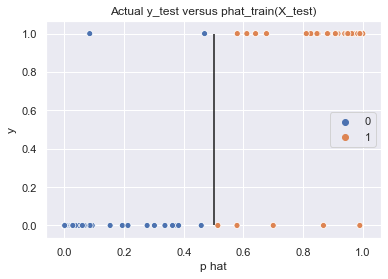

In [75]:
thresh = 0.5
sns.scatterplot(x=p_hat, y=df_test['y'], hue=1*(p_hat > thresh))
plt.legend(loc='center right')
plt.xlabel('p hat')
plt.vlines(x=thresh, ymin=0, ymax=1)
plt.title('Actual y_test versus phat_train(X_test)')
plt
plt.show()

In [85]:
def senspec(y, score, thresh):
    yhat = 1*(score >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    sens = tp / (fn + tp)
    spec = tn / (fp + tn)
    return pd.DataFrame({'tn':[tn], 
                         'fp':[fp], 
                         'fn':[fn], 
                         'tp':[tp], 
                         'sens':[sens], 
                         'spec':[spec]})

In [86]:
senspec(df_test['y'], p_hat, thresh)

,tn,fp,fn,tp,sens,spec
0,62,5,2,31,0.939394,0.925373


**b) (2 pts)** Compute and display the ROC curve for the training model you selected as a classifier of the test data. There was a function defined in class notes to help plot ROC curves.

In [87]:
fpr, tpr, score = roc_curve(y_true=df_test['y'], y_score=p_hat)
auc = roc_auc_score(y_true=df_test['y'], y_score=p_hat)

In [88]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

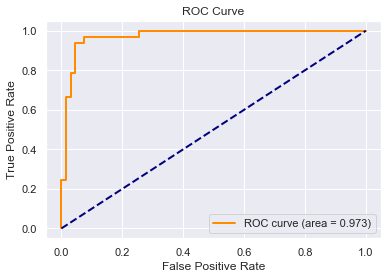

In [89]:
plot_roc(fpr, tpr, auc)